In [1]:
import ROOT
import numpy as np
import pandas as pd
import time
import printColor as pc
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from celluloid import Camera
from moviepy.editor import *
from matplotlib import gridspec
import scipy.stats as stats


color = pc.bcolors()

ROOT.ROOT.EnableImplicitMT()

def importROOT(filename):
	f = ROOT.TFile.Open(filename, "read")
	tree = f.Get("Hit")
	dataTrack, columnsTrack = tree.AsMatrix(return_labels=True)
	track = pd.DataFrame(data=dataTrack, columns=columnsTrack)
	return(track)

Welcome to JupyROOT 6.21/01
 start : color class is imported.. 


In [2]:
track = importROOT("~/data/g2wd10k_1.root")
eID = track['eventID']

In [3]:
print(track)

        eventID   hitTime     hitPosX     hitPosY     hitPosZ     hitPMag  \
0           0.0  1.864842 -244.145496 -125.520670   -1.162825  173.582812   
1           0.0  2.024924 -237.285947  -78.150340   -1.705516  173.582812   
2           0.0  2.176869 -220.514888  -35.938592   -3.156726  173.582812   
3           0.0  2.319355 -196.202879   -1.000000   -5.472329  173.582812   
4           0.0  2.450758 -167.241815   25.476036   -7.996569  173.582812   
...         ...       ...         ...         ...         ...         ...   
286416   9999.0  4.317965   96.386414  186.966298 -247.825312   72.114738   
286417   9999.0  4.439602   67.104046  203.288951 -260.705008   72.114738   
286418   9999.0  5.501702   96.669420  187.521730 -365.365426   72.114738   
286419   9999.0  5.622322   67.220428  203.647136 -377.175575   72.114738   
286420   9999.0  6.647833   96.465814  187.122131 -483.614236   72.114738   

             hitPX       hitPY      hitPZ       hitRA        hitR  \
0     

In [4]:
print(eID)

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
286416    9999.0
286417    9999.0
286418    9999.0
286419    9999.0
286420    9999.0
Name: eventID, Length: 286421, dtype: float64


In [5]:
eID = track['eventID']
eID = eID.drop_duplicates()
eIDNum = len(eID)

In [6]:
eIDNum = range(eIDNum)

In [7]:
print(eIDNum)

range(0, 8755)


In [8]:
timeWinTotal = 60e-6 # s
binNum = 5e-9 # s
timeWinNum = int(timeWinTotal / binNum)

In [9]:
print(timeWinNum)


12000


In [10]:
timeNum = range(timeWinNum)

In [14]:
dfMuonPos = pd.DataFrame([])


0
100
200
300
400
500
600
700
800
900
         hitTime     hitPosX     hitPosY     hitPosZ     hitPMag   hitTime  \
3300    0.261761   90.231938  274.469283   -7.238179   20.591296  0.261761   
251315  0.280090  -45.415228 -287.449473   -6.520492  120.560842  0.280090   
117886  0.298346 -253.873220 -130.477193  -11.059450   70.005856  0.298346   
240148  0.296538  170.661629 -235.721391  -27.076385   83.912936  0.296538   
273109  0.308764   82.019228 -255.665297   25.098409   37.423350  0.308764   
...          ...         ...         ...         ...         ...       ...   
268766  4.996623 -235.768885 -121.252573 -153.678466  270.253979  4.996623   
270066  4.996463 -125.305665   -1.000000  183.493403  198.410302  4.996463   
272020  4.996594   76.647618  152.632109 -175.865152  156.760951  4.996594   
275561  4.999785 -199.091097  145.884217  -33.460537   58.339683  4.999785   
284936  4.999344  188.863884  -28.900635  -57.024739  248.147416  4.999344   

              hitR       

MoviePy - Building file muon.gif with imageio.


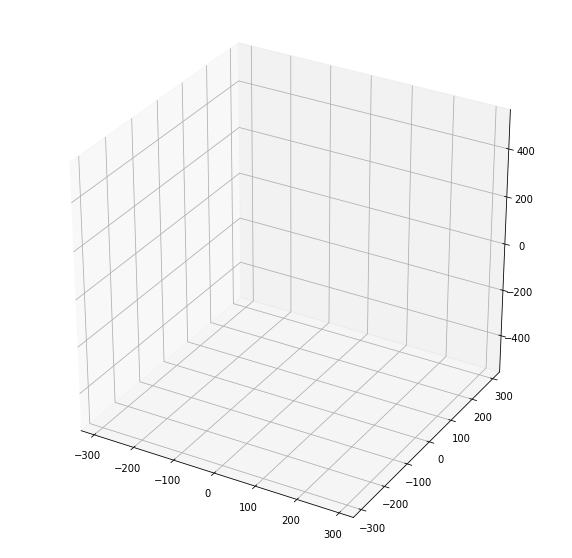

In [15]:
fig1 = plt.figure(1, figsize =(10 , 10))
pos = fig1.add_subplot(111, projection='3d')
#gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
camera = Camera(fig1)
BinRange = range(timeWinNum)
test = range(1000)
#for j in timeNum:
for j in test:
    #ax0 = plt.subplot(gs[0])
    #print(color.RED + "Time Window = ",j*5e-3, "-", j*5e-3+5e-3 ,color.ENDC)
    dfMuonPosTemp = track[(track['hitTime'] >= j*5e-3) & (track['hitTime'] < j*5e-3+5e-3)] 
    dfMuonPosTemp['timeBin'] = j
    if (j % 100 ==0):
        print(j)
    #print(j)
    #dfMuonPosTemp = dfMuonPosTemp[['hitTime' , 'hitPosX', 'hitPosY' ,'hitPosZ','hitPMag','hitTime','hitR','eDep','hitAngle','VolID','timeBin']]
    dfMuonPosTemp = dfMuonPosTemp[['hitPosX', 'hitPosY' ,'hitPosZ']]
    #ax0.bar("momMag",dfMuonPosTemp['momMag'] )
    dfMuonPos = pd.concat([dfMuonPos, dfMuonPosTemp])
    pos.scatter(dfMuonPosTemp["hitPosX"],dfMuonPosTemp["hitPosY"],dfMuonPosTemp["hitPosZ"], color='r' )
    #print(dfMuonPos)
    #ax1.hist(dfMuonPos["hitPMag"], range = (0,300), bins = 300)
    #ax2.hist(dfMuonPos["hitTime"], range = (0,60), bins = timeWinNum)
    camera.snap()
print(dfMuonPos)
#animation = camera.animate(interval=1, blit=True)
animation = camera.animate()
animation.save("muon.mp4")

#animation.save(
#    'test.mp4',
#    dpi=100,
#    savefig_kwargs={
#        'frameon': False,
#        'pad_inches': 'tight'
#    }
#)
clip = (VideoFileClip("muon.mp4").speedx(10))
clip.write_gif("muon.gif")

